In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [8]:
experiment_series ="20250529"
subsetting_1 = "fitting_curves"
subsetting_2a = "12589000"
subsetting_2b = "400000000"

result_path = f"../../preprocessing/preprocessed_data/{experiment_series}"

In [9]:
# Load the data
def load_simulations(memilio_id, result_path, subsetting_1, subsetting_2):
    df = pd.read_csv(f"{result_path}/substances/{subsetting_1}_{subsetting_2}_output.csv")
    df = df.loc[df.simulation_id == memilio_id].drop(columns=["simulation_id"])
    df["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df["time_in_minutes"], unit="min")
    return df

def load_measurements():
    df_measurements = pd.read_csv(f"../../preprocessing/preprocessed_data/concentration_measurements.csv")
    df_measurements.Location = df_measurements.Location.replace({'Langrieder \nBach': "Am Langwieder Bach",
                                    'Gräfelfinger Str. \n/Waldwiesenstr.': "Gräfelfinger Str.",
                                    "Schmidbartlanger ": "Schmidbartlanger", 
                                    "Savitsstr.": "Savitstr.", 
                                    "Gyßling Becken": "Gyßlinger Becken"})

    df_measurements["Below_threshold"] = False
    df_measurements.loc[df_measurements.Value=="<75", "Below_threshold"] = True
    df_measurements.loc[df_measurements.Value=="<75", "Value"] = 75/2
    df_measurements.Value = df_measurements.Value.astype(float)
    df_measurements.Date = pd.to_datetime(df_measurements.Date)
    return df_measurements

In [ ]:
df_1 = load_simulations(1, result_path, subsetting_1, subsetting_2a) # smaller values
df_2 = load_simulations(1, result_path, subsetting_1, subsetting_2b)

df_measurements = load_measurements()

In [38]:
df_1.head()

,time_in_minutes,variable,value,manhole,time_in_days,Date
0,15,COV19,22.97570,MUC012,0.010417,2020-03-02 00:15:00
1,30,COV19,24.83174,MUC012,0.020833,2020-03-02 00:30:00
2,45,COV19,26.67474,MUC012,0.031250,2020-03-02 00:45:00
3,60,COV19,28.48136,MUC012,0.041667,2020-03-02 01:00:00
4,75,COV19,30.31266,MUC012,0.052083,2020-03-02 01:15:00


In [16]:
(df_1.loc[df_1.variable=="COV19", "value"]/df_2.loc[df_2.variable=="COV19", "value"]).describe()

count    149593.000000
mean          0.031455
std           0.000857
min           0.000000
25%           0.031473
50%           0.031473
75%           0.031473
max           0.062500
Name: value, dtype: float64

In [17]:
12589000/400000000

0.0314725

In [18]:
df_1_sub = df_1.loc[df_1.variable=="COV19", ["Date", "value", "manhole"]].rename(columns={"value": "COV19_12589000"})
df_2_sub = df_2.loc[df_2.variable=="COV19", ["Date", "value", "manhole"]].rename(columns={"value": "COV19_400000000"})
df = pd.merge(df_1_sub, df_2_sub, on=["Date", "manhole"], how="outer")

In [ ]:
df["fraction"] = df["COV19_12589000"]/df["COV19_400000000"]

In [51]:
(df["COV19_400000000"]/df["COV19_12589000"]).describe()["50%"]

/home/nina/PycharmProjects/INSIDeMunich/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


np.float64(31.773129406620765)

In [35]:
df = df.loc[~((df["COV19_400000000"]==0.0 )& (df["COV19_12589000"]==0.0))]

In [41]:
df_unequal = df.loc[~((df.fraction >= 0.031472) & (df.fraction <= 0.0314744)), :]

In [45]:
df_unequal.loc[df_unequal.fraction>0.04]

,Date,COV19_12589000,manhole,COV19_400000000,fraction
1923,2020-03-03 04:30:00,0.00001,MUC112,0.00022,0.045455
1940,2020-03-03 04:45:00,0.00001,MUC112,0.00019,0.052632
1957,2020-03-03 05:00:00,0.00001,MUC112,0.00017,0.058824
2296,2020-03-03 10:00:00,0.00001,MUC060,0.00020,0.050000
3742,2020-03-04 07:15:00,0.00002,MUC112,0.00049,0.040816
3844,2020-03-04 08:45:00,0.00001,MUC112,0.00023,0.043478
3861,2020-03-04 09:00:00,0.00001,MUC112,0.00020,0.050000
8707,2020-03-07 08:15:00,0.00001,MUC348,0.00022,0.045455
8724,2020-03-07 08:30:00,0.00001,MUC348,0.00019,0.052632
8741,2020-03-07 08:45:00,0.00001,MUC348,0.00016,0.062500


/tmp/ipykernel_11684/800845585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_11684/800845585.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


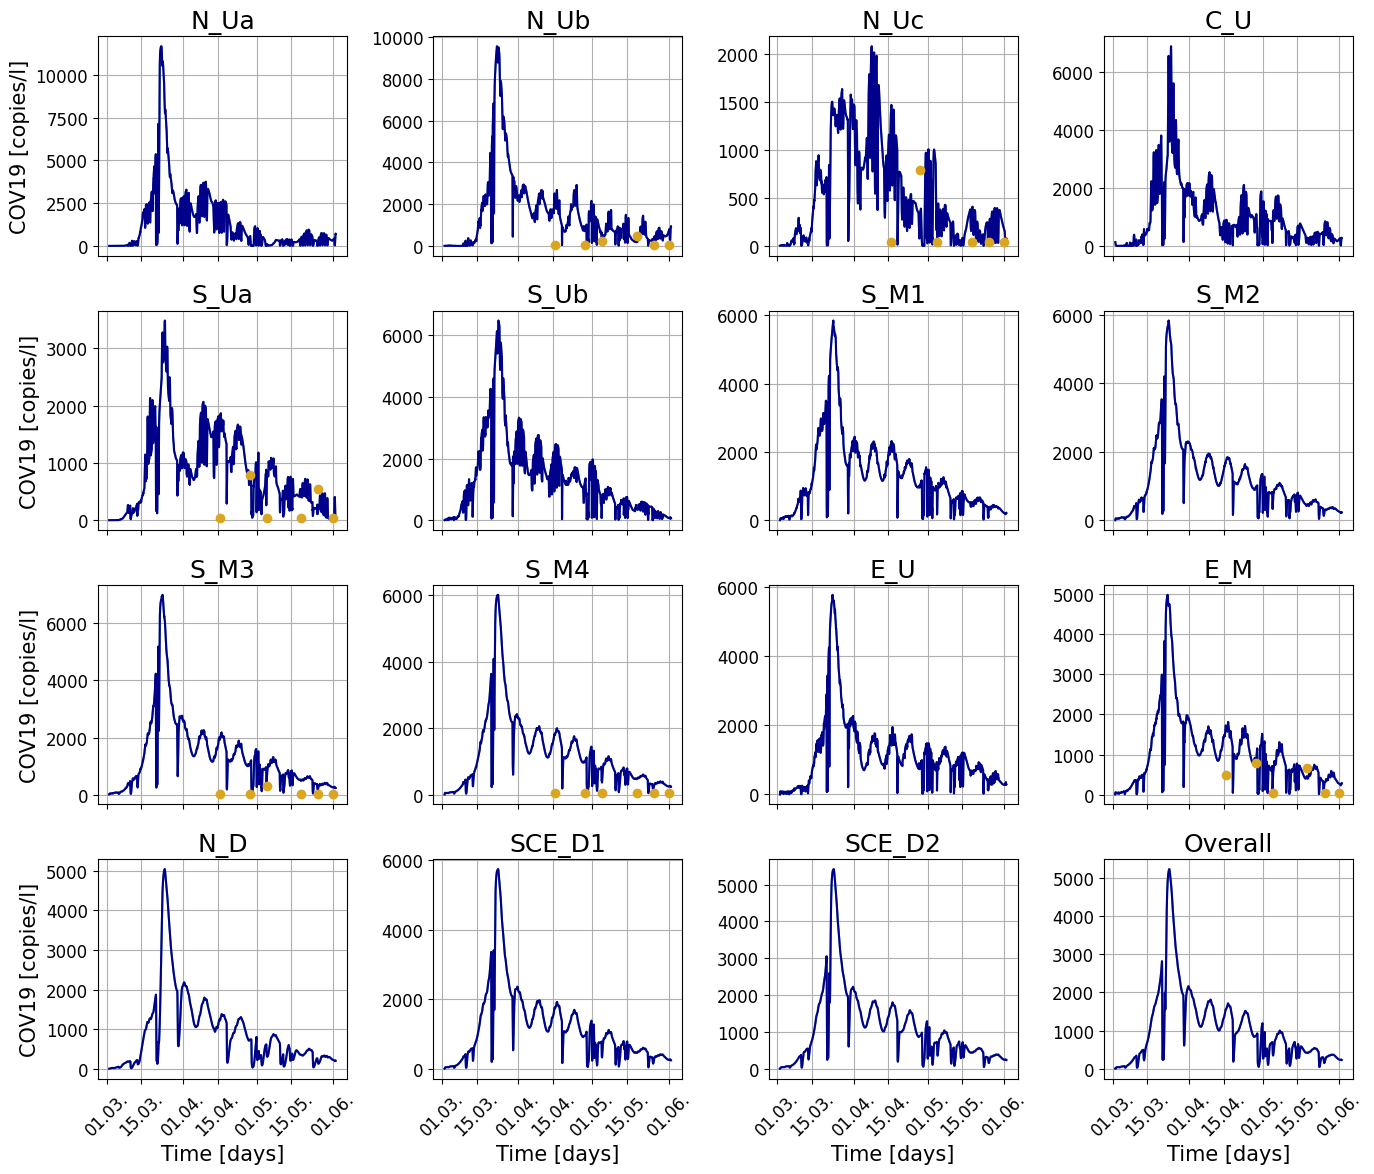

In [52]:
# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True)
axes = axes.flatten()

# first df
covid_df = df_1[(df_1["variable"] == "COV19") & (df_1["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"]*31.773129, color="cadetblue")

# second df + plot settings + measurements
covid_df = df_2[(df_2["variable"] == "COV19") & (df_2["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color="darkblue")

    ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color="goldenrod", zorder=10)

    ax.set_title(location)
    if i%4 == 0:
        ax.set_ylabel("COV19 [copies/l]")
    else:
        ax.set_ylabel("")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()
